In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import uproot

from test_functions import *

set_matplotlib_style()

END OF SCRIPT


In [2]:
run_dir = '/home/akallits/Documents/PicoAnalysis/Saclay_Analysis/data/2023_April_h4/processedTrees/'
print(os.listdir(run_dir))
# run_path = f'{run_dir}Run248-Pool4_TESTBEAM_tree.root'
run_path = f'{run_dir}Run243-Pool2_TESTBEAM_tree.root'

['Run248-Pool4_TESTBEAM_tree.root', 'Run243-Pool2_TESTBEAM_tree.root', 'Run243-Pool5_TESTBEAM_tree.root', 'Run103-Pool2_TESTBEAM_tree.root', 'Run243-Pool4_TESTBEAM_tree.root', 'ParameterTrees', 'Run401-GDD_TESTBEAMraw_tree.root']


In [3]:
tree = get_tree(run_path, 'RawDataTree')
print(tree.keys())

['eventNo', 'srsNo', 'dt', 'epoch', 'nn', 't0', 'itrigger', 'ttrig', 'fitstatus1', 'fitstatus2', 'rmax', 'rmin', 'trackOK', 'eventTracks', 'chi2track', 'refP1', 'refP2', 'disttonextcluster', 'totchargenextcluster', 'sumpoints', 'amplC1', 'hitX_C1', 'hitY_C1', 'amplC2', 'hitX_C2', 'hitY_C2', 'amplC4', 'hitX_C4', 'hitY_C4', 'bslC', 'rmsC']


In [4]:
channels = ['C1', 'C2', 'C4']
channel_vars = ['hitX_', 'hitY_']
branches = []
for channel in channels:
    for var in channel_vars:
        branches.append(f'{var}{channel}')
df = get_df_branches(tree, branches)

<Report start=0 stop=30400 source='/home/akallits/Documents/PicoAnalysis/Saclay_Analysis/data/2023_April_h4/processedTrees/Run243-Pool2_TESTBEAM_tree.root:/RawDataTree;1'>


In [5]:
print(df.head())

               hitX_C1               hitY_C1               hitX_C2  \
0  [29.45302391052246]  [24.807174682617188]  [30.537242889404297]   
1  [29.45302391052246]  [24.807174682617188]  [30.537242889404297]   
2  [29.45302391052246]  [24.807174682617188]  [30.537242889404297]   
3  [29.45302391052246]  [24.807174682617188]  [30.537242889404297]   
4  [29.45302391052246]  [24.807174682617188]  [30.537242889404297]   

              hitY_C2               hitX_C4             hitY_C4  
0  [25.7227725982666]  [30.537242889404297]  [25.7227725982666]  
1  [25.7227725982666]  [30.537242889404297]  [25.7227725982666]  
2  [25.7227725982666]  [30.537242889404297]  [25.7227725982666]  
3  [25.7227725982666]  [30.537242889404297]  [25.7227725982666]  
4  [25.7227725982666]  [30.537242889404297]  [25.7227725982666]  


In [6]:
def get_single_peak_processed_tree(df, channel):
    "Extract a single peak for each channel"
    peak_no = 0
    columns = df.columns
    for col in columns:
        if f'_{channel}' in col:
            df[col] = df[col].apply(lambda x: x[peak_no] if len(x) > peak_no else np.nan)

In [7]:
for channel in channels:
    get_single_peak_processed_tree(df, channel)

In [8]:
print(df.head())
hitx = df['hitX_C1'].iloc[0]
for row_i in range(len(df['hitX_C1'])):
    if df['hitX_C1'].iloc[row_i] != hitx:
        print(f'{row_i} -> {hitx}')
        break

     hitX_C1    hitY_C1    hitX_C2    hitY_C2    hitX_C4    hitY_C4
0  29.453024  24.807175  30.537243  25.722773  30.537243  25.722773
1  29.453024  24.807175  30.537243  25.722773  30.537243  25.722773
2  29.453024  24.807175  30.537243  25.722773  30.537243  25.722773
3  29.453024  24.807175  30.537243  25.722773  30.537243  25.722773
4  29.453024  24.807175  30.537243  25.722773  30.537243  25.722773
4416 -> 29.45302391052246


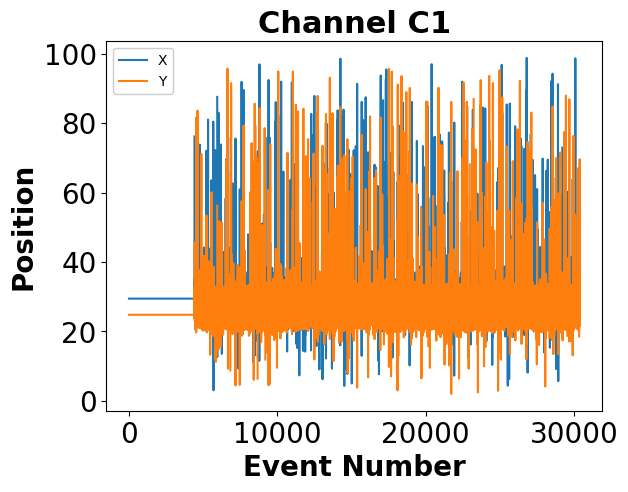

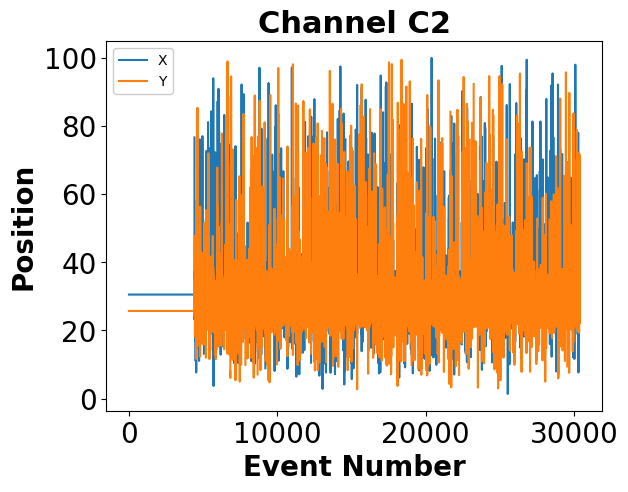

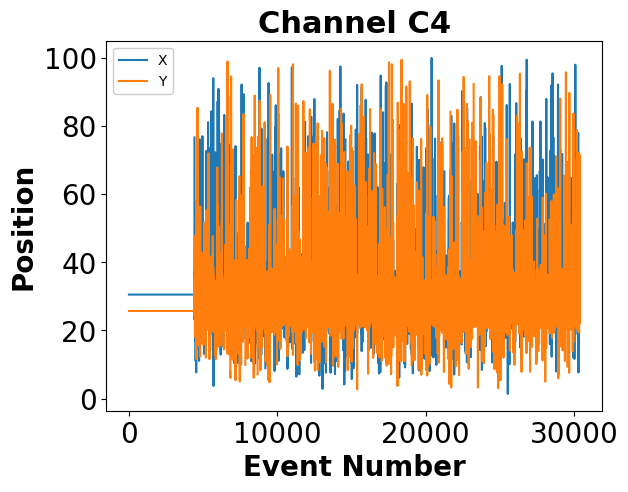

In [9]:
# For each channel plot x and y hit vs row number
for channel in channels:
    fig, ax = plt.subplots()
    ax.plot(df[f'hitX_{channel}'], label='X')
    ax.plot(df[f'hitY_{channel}'], label='Y')

    ax.set_title(f'Channel {channel}')
    ax.set_xlabel('Event Number')
    ax.set_ylabel('Position')
    ax.legend()